# Investigating the 'potenitally sex regulated peaks' 

So far we've used the peaks I assigned as 'potentially sex regulated' for our random forest model, however the way I've defined these peaks is not very concrete

We want to see if there is any structure/patterns in the accessibility of the peaks between our knock out and wildtype samples. 

To do this we want to plot the accessibility values of these peaks across our different samples and see if they cluster together.
A simple way of doing this is to use clustermap which will cluster and plot our accesibility values so that those peaks that have similar patterns across the samples will be next to each other 

See documentation here: 

- https://python-charts.com/correlation/clustermap-seaborn/#google_vignette
- https://seaborn.pydata.org/generated/seaborn.clustermap.html
- https://www.youtube.com/watch?v=crQkHHhY7aY



In [3]:
!date
!pwd

Mon  7 Aug 2023 16:03:36 BST
/Users/charlie/Documents/02_research/03_UNIQ+/UNIQ_plus_2023/uniq_plus_2023/code/1_feature_processing.dir


In [11]:
import pandas as pd
import numpy as np

This is the stuff we need to add to get seaborn to work 

In [12]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

1. read in the normalised accessibility values for all peaks 

In [13]:
normalised_counts = pd.read_csv('/project/sims-lab/shared/uniq_plus_2023/annotation_of_peaks/differential_accesibility_analysis/peaks_annoated_with_genotype_and_sex_DA_normalised_counts.tsv.gz', sep='\t')

In [14]:
normalised_counts

,peak_id,basson_KO_R1,basson_KO_R2,basson_KO_R3,basson_WT_R1,basson_WT_R2,basson_WT_R3,category
0,atac_de_peak_chr1_3094800_3095300,70.807221,74.746079,55.686409,67.492308,74.726960,47.857595,not_sex_or_chd7_regulated
1,atac_de_peak_chr1_3333586_3334086,27.073349,23.160757,32.643757,23.497322,24.553144,25.234005,not_sex_or_chd7_regulated
2,atac_de_peak_chr1_3360824_3361324,91.632874,67.376747,72.008288,71.491852,56.578984,77.442290,not_sex_or_chd7_regulated
3,atac_de_peak_chr1_3369447_3369947,85.385178,60.007415,67.207735,44.994872,51.241344,34.805524,not_sex_or_chd7_regulated
4,atac_de_peak_chr1_3372613_3373113,104.128266,75.798840,74.888619,94.489231,58.714040,76.572152,not_sex_or_chd7_regulated
...,...,...,...,...,...,...,...,...
112337,atac_de_peak_chrY_90805461_90805961,22.908219,34.741135,25.922984,25.497094,77.929544,57.429114,not_sex_or_chd7_regulated
112338,atac_de_peak_chrY_90807482_90807982,91.632874,128.436924,65.287514,86.490143,180.412231,131.390851,not_sex_or_chd7_regulated
112339,atac_de_peak_chrY_90808554_90809054,120.788788,154.755966,74.888619,83.490485,240.193799,78.312428,not_sex_or_chd7_regulated
112340,atac_de_peak_chrY_90825143_90825643,52.064133,0.000000,0.000000,0.999886,54.443928,20.883314,deffinetly_sex_regulated


2. have a look at this dataframe - what size is it, are all the columns looking ok, does it have column names and are they formatted correctly? 

In [22]:
type(normalised_counts)

pandas.core.frame.DataFrame

In [31]:
# size

normalised_counts.shape

(112342, 8)

In [32]:
# checking column names 
normalised_counts.columns

Index(['peak_id', 'basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3',
       'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3', 'category'],
      dtype='object')

In [33]:
# Checking is columns are formatted correctly 
def is_valid_column_name(peak_id):
    return all(c.isalpha() or c.isspace() for c in normalised_counts)

incorrect_columns = [col for col in normalised_counts.columns if not is_valid_column_name(col)]

if incorrect_columns:
    print("Incorrectly formatted column names:", incorrect_columns)
else:
    print("All column names are correctly formatted.")

Incorrectly formatted column names: ['peak_id', 'basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3', 'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3', 'category']


3. Lets just keep the rows that are the potentially sex regulated ones - there should be about 3000 

In [55]:
category_values = normalised_counts['category'].unique()
category_values

array(['not_sex_or_chd7_regulated', 'potentially_sex_regulated',
       'chd7_regulated', nan, 'deffinetly_sex_regulated'], dtype=object)

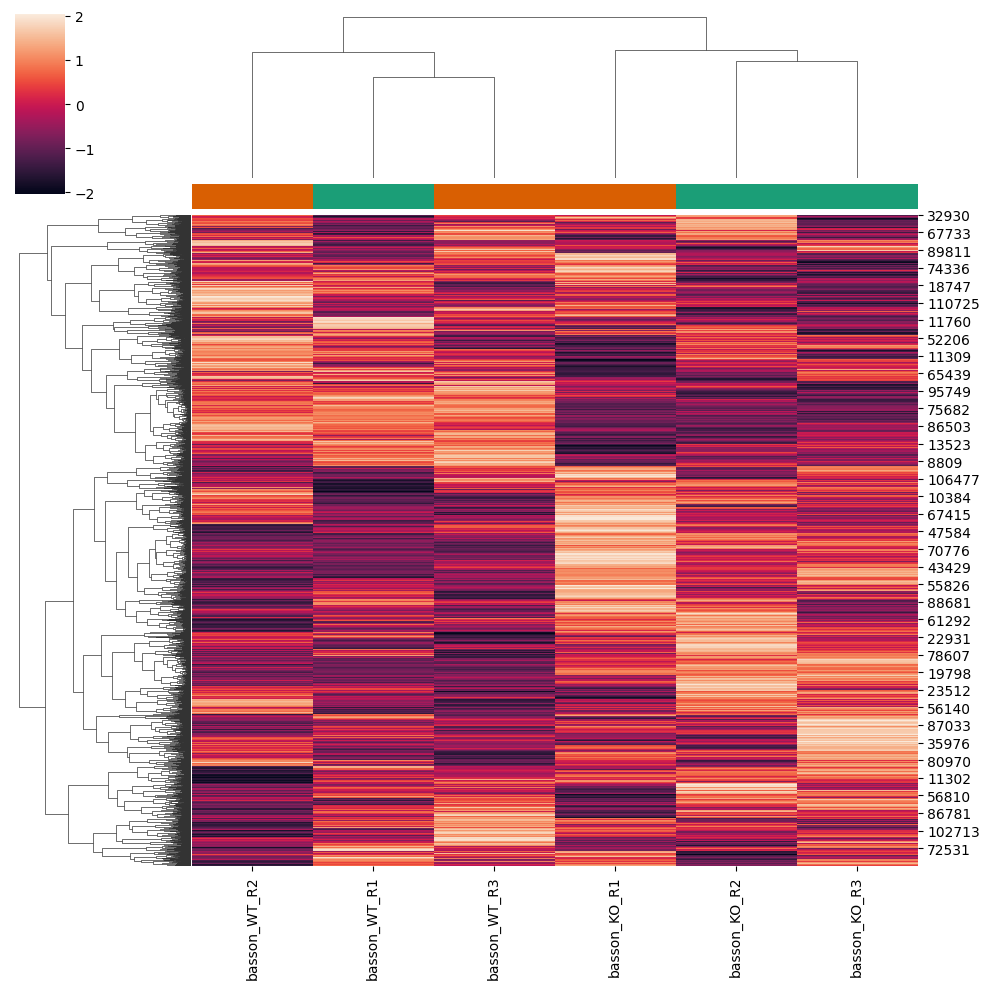

In [122]:
normalised_counts = pd.DataFrame(scaled_data, columns=numerical_columns)
sns.clustermap(normalised_counts, z_score = 0, 
               col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02'],
                             metric = 'correlation')

In [97]:
# Filter out rows with potentially sex regulated 

subset_potentially_sex_regulated_df = normalised_counts[normalised_counts['category'] == 'potentially_sex_regulated']

In [98]:
subset_potentially_sex_regulated_df

,peak_id,basson_KO_R1,basson_KO_R2,basson_KO_R3,basson_WT_R1,basson_WT_R2,basson_WT_R3,category
5,atac_de_peak_chr1_3447412_3447912,60.394394,69.482270,54.726299,37.495727,26.688200,31.324971,potentially_sex_regulated
66,atac_de_peak_chr1_6526794_6527294,45.816437,35.793897,50.885857,85.490257,75.794488,78.312428,potentially_sex_regulated
172,atac_de_peak_chr1_11177642_11178142,177.018052,223.185474,233.306852,283.967636,239.126271,347.185097,potentially_sex_regulated
190,atac_de_peak_chr1_12285972_12286472,35.403610,49.479799,35.524089,65.492536,75.794488,100.936018,potentially_sex_regulated
218,atac_de_peak_chr1_13004969_13005469,129.119050,142.122826,156.498012,101.488433,108.887855,68.740909,potentially_sex_regulated
...,...,...,...,...,...,...,...,...
112061,atac_de_peak_chrX_160338525_160339025,70.807221,63.165700,62.407183,28.996695,35.228424,37.415938,potentially_sex_regulated
112073,atac_de_peak_chrX_160863653_160864153,62.476960,70.535032,77.768951,105.987921,103.550215,118.338780,potentially_sex_regulated
112192,atac_de_peak_chrX_164764014_164764514,401.935106,407.418767,402.286301,509.941882,486.792765,504.680091,potentially_sex_regulated
112217,atac_de_peak_chrX_166305676_166306176,37.486176,36.846659,43.204973,69.492080,75.794488,80.922842,potentially_sex_regulated


In [101]:
subset_not_sex_or_chd7_regulated_df = normalised_counts[normalised_counts['category'] == 'not_sex_or_chd7_regulated']

In [102]:
subset_not_sex_or_chd7_regulated_df

,peak_id,basson_KO_R1,basson_KO_R2,basson_KO_R3,basson_WT_R1,basson_WT_R2,basson_WT_R3,category
0,atac_de_peak_chr1_3094800_3095300,70.807221,74.746079,55.686409,67.492308,74.726960,47.857595,not_sex_or_chd7_regulated
1,atac_de_peak_chr1_3333586_3334086,27.073349,23.160757,32.643757,23.497322,24.553144,25.234005,not_sex_or_chd7_regulated
2,atac_de_peak_chr1_3360824_3361324,91.632874,67.376747,72.008288,71.491852,56.578984,77.442290,not_sex_or_chd7_regulated
3,atac_de_peak_chr1_3369447_3369947,85.385178,60.007415,67.207735,44.994872,51.241344,34.805524,not_sex_or_chd7_regulated
4,atac_de_peak_chr1_3372613_3373113,104.128266,75.798840,74.888619,94.489231,58.714040,76.572152,not_sex_or_chd7_regulated
...,...,...,...,...,...,...,...,...
112335,atac_de_peak_chrY_90803356_90803856,35.403610,53.690845,58.566741,71.991795,54.443928,80.052704,not_sex_or_chd7_regulated
112336,atac_de_peak_chrY_90804817_90805317,70.807221,151.597681,36.484199,51.494131,230.586047,73.091599,not_sex_or_chd7_regulated
112337,atac_de_peak_chrY_90805461_90805961,22.908219,34.741135,25.922984,25.497094,77.929544,57.429114,not_sex_or_chd7_regulated
112338,atac_de_peak_chrY_90807482_90807982,91.632874,128.436924,65.287514,86.490143,180.412231,131.390851,not_sex_or_chd7_regulated


In [110]:
numerical_columns = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3', 'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']

subset_not_sex_or_chd7_regulated_df = normalised_counts[numerical_columns]
scaler = StandardScaler()

subset_not_sex_or_chd7_regulated_df = np.log2(subset_not_sex_or_chd7_regulated_df + 1) 
log2_scaled_data = scaler.fit_transform(log2_subset)
log2_scaled_data = scaler.fit_transform(subset_not_sex_or_chd7_regulated_df)

subset_not_sex_or_chd7_regulated_df = pd.DataFrame(scaled_data, columns=numerical_columns)

In [ ]:
subset_not_sex_or_chd7_regulated_df

# Get numerical columns 
# Do log2 on new numerical columns = np.log2(subset_df + 1) 
# Put on clustermap 
# run clustermap again with z_parameter on turn/off 

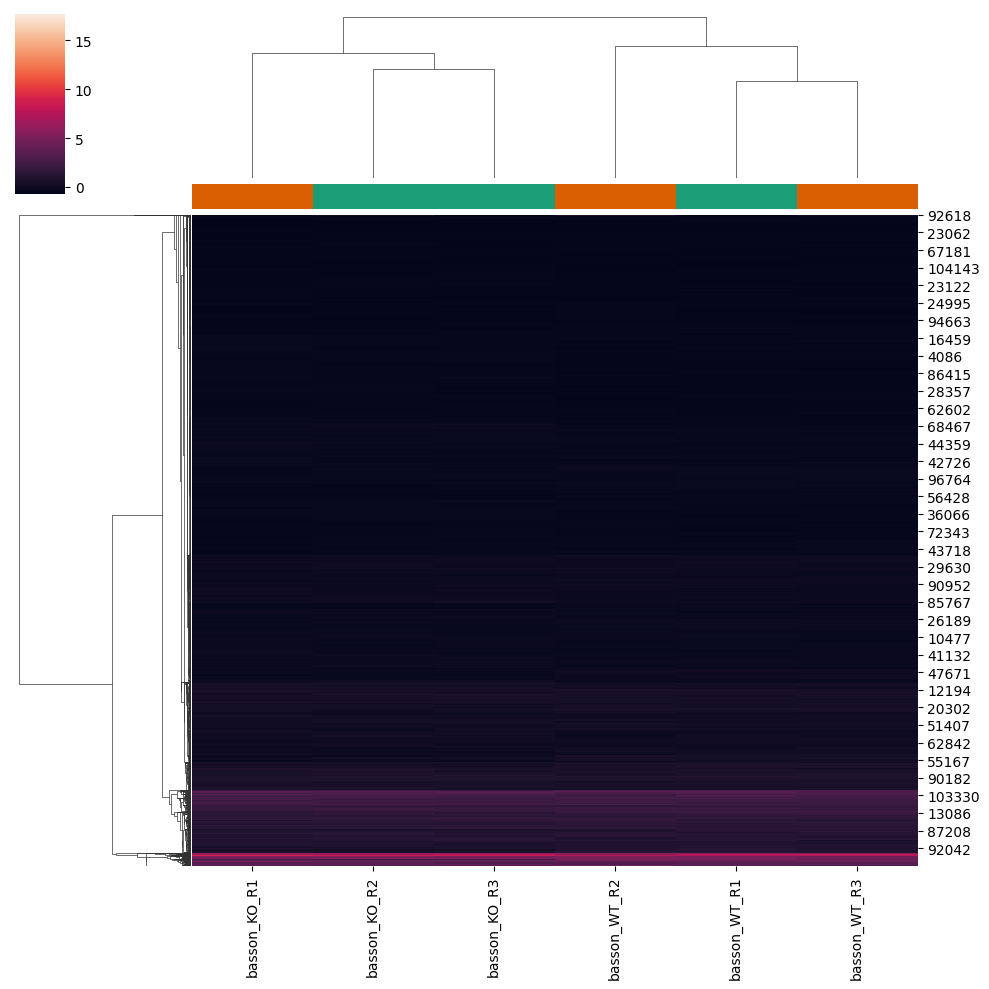

In [115]:
sns.clustermap(subset_not_sex_or_chd7_regulated_df, col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02']) 

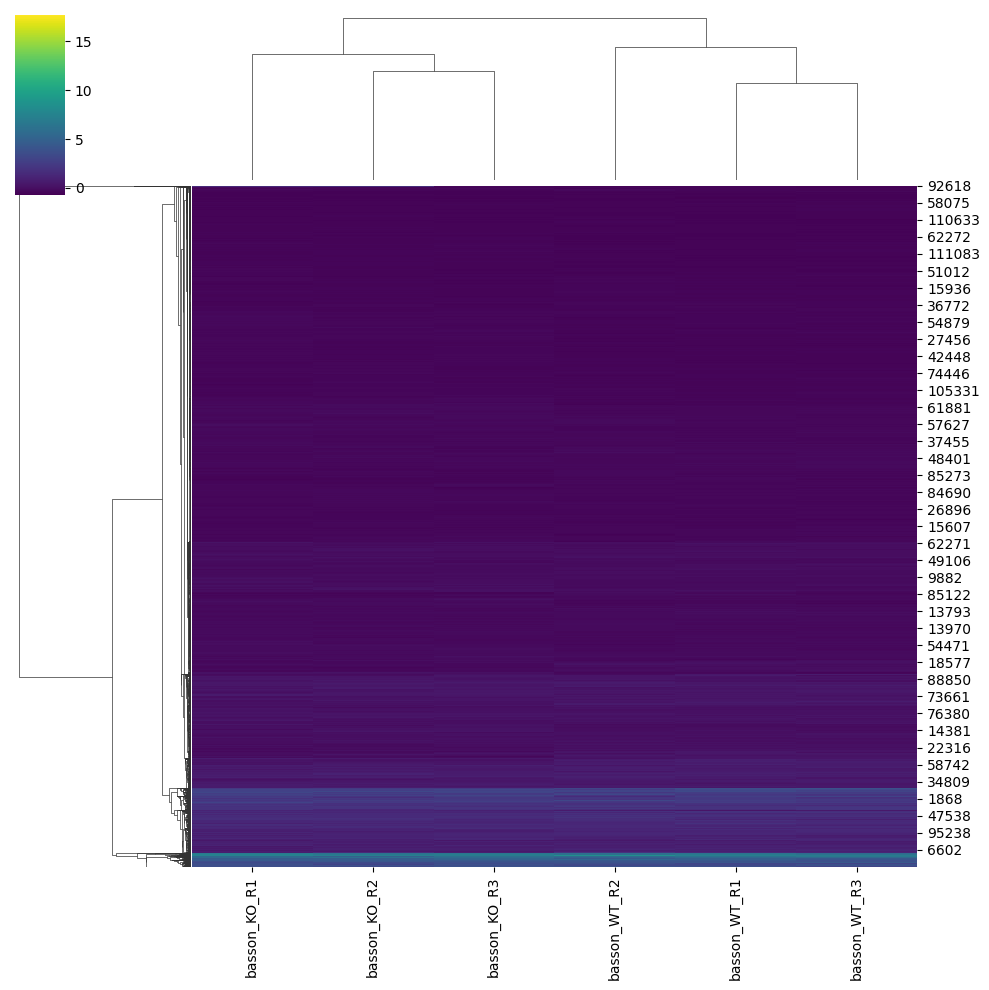

interactive(children=(Checkbox(value=False, description='Use Z-Score Normalization', layout=Layout(width='auto…

<function __main__.interactive_clustermap(use_z_score)>

In [112]:
from ipywidgets import interact, Checkbox, Layout

def interactive_clustermap(use_z_score):
    if use_z_score:
        z_scores = (subset_not_sex_or_chd7_regulated_df - subset_not_sex_or_chd7_regulated_df.mean()) / subset_not_sex_or_chd7_regulated_df.std()
        data_to_use = z_scores
    else:
        data_to_use = subset_not_sex_or_chd7_regulated_df
    
    sns.clustermap(data_to_use, cmap='viridis')

# Create checkboxes for turning on/off z-score normalization
z_score_checkbox = Checkbox(
    value=False,
    description='Use Z-Score Normalization',
    layout=Layout(width='auto')
)

# Create interactive visualization
interact(interactive_clustermap, use_z_score=z_score_checkbox)

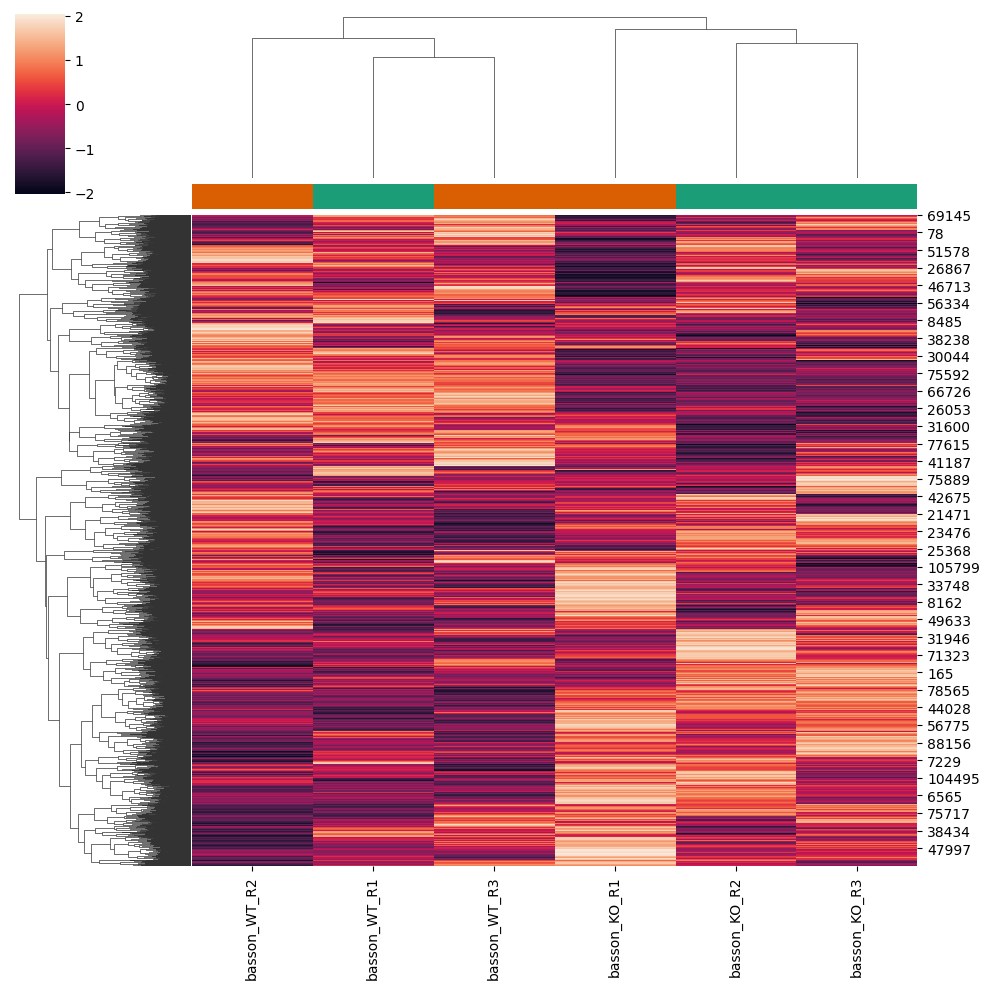

In [116]:
sns.clustermap(subset_not_sex_or_chd7_regulated_df, z_score = 0, 
               col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02']) 

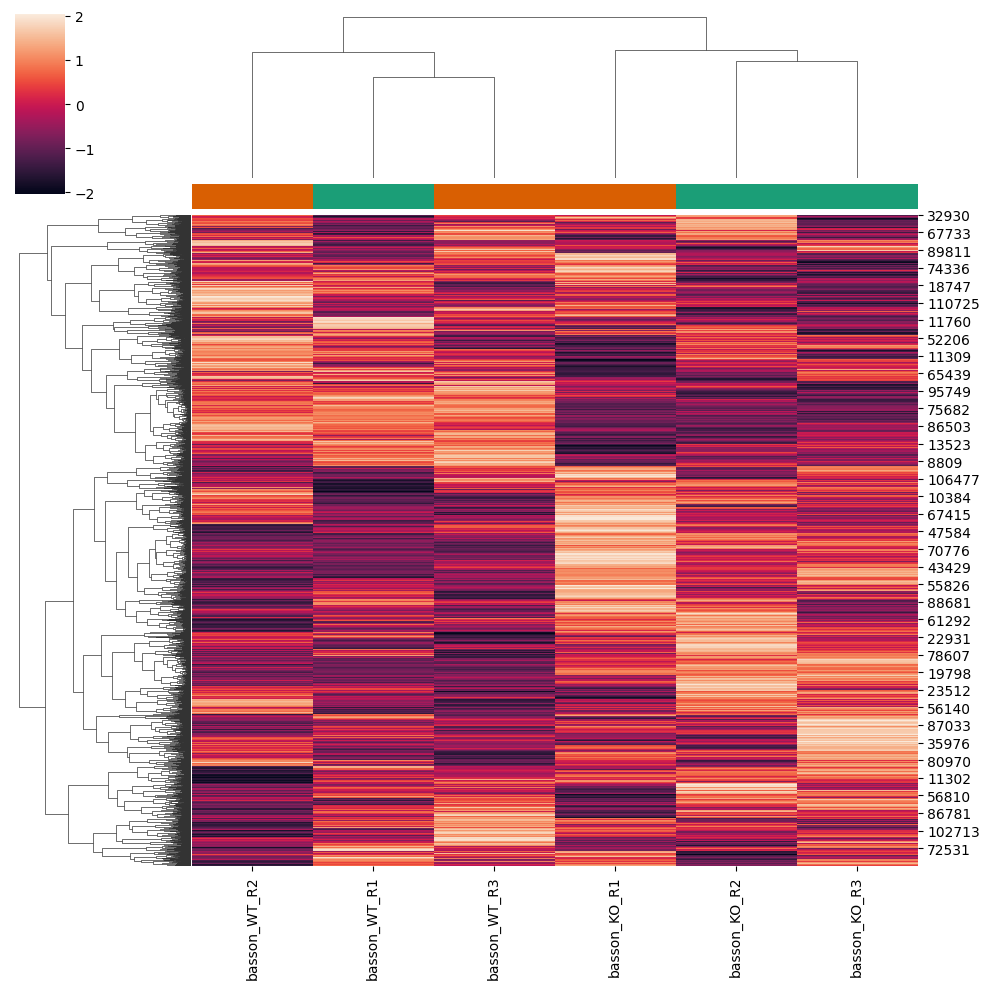

In [118]:
sns.clustermap(subset_not_sex_or_chd7_regulated_df, z_score = 0, 
               col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02'],
                             metric = 'correlation')

In [103]:
subset_chd7_regulated_df = normalised_counts[normalised_counts['category'] == 'chd7_regulated']

In [105]:
subset_chd7_regulated_df

,peak_id,basson_KO_R1,basson_KO_R2,basson_KO_R3,basson_WT_R1,basson_WT_R2,basson_WT_R3,category
9,atac_de_peak_chr1_3552426_3552926,129.119050,174.758437,160.338454,337.461539,270.084582,324.561507,chd7_regulated
36,atac_de_peak_chr1_4970580_4971080,118.706223,150.544919,179.540664,242.472365,225.248407,221.015074,chd7_regulated
65,atac_de_peak_chr1_6526163_6526663,24.990784,24.213518,23.042652,60.493106,62.984152,60.909666,chd7_regulated
68,atac_de_peak_chr1_6651198_6651698,99.963135,91.590265,110.412708,267.469516,198.560207,247.989355,chd7_regulated
69,atac_de_peak_chr1_6729634_6730134,422.760760,495.850747,449.331715,737.415956,675.745220,768.331931,chd7_regulated
...,...,...,...,...,...,...,...,...
112190,atac_de_peak_chrX_164576909_164577409,137.449311,137.911779,150.737349,266.469630,226.315935,222.755350,chd7_regulated
112223,atac_de_peak_chrX_166329013_166329513,143.697007,210.552334,213.144532,266.469630,241.261327,255.820598,chd7_regulated
112247,atac_de_peak_chrX_166749161_166749661,22.908219,27.371803,25.922984,89.989744,48.038760,94.845052,chd7_regulated
112249,atac_de_peak_chrX_166779391_166779891,181.183183,241.082423,192.982211,301.965585,274.354694,283.665017,chd7_regulated


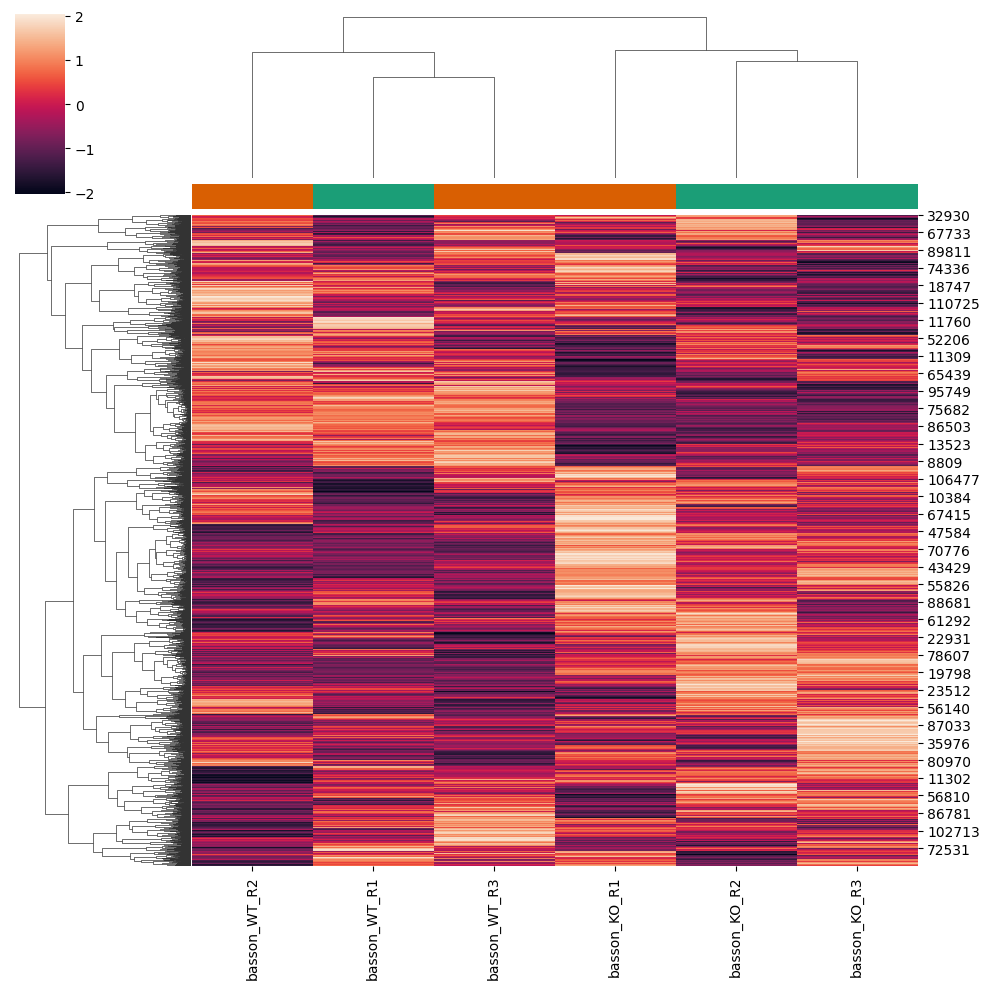

In [120]:
subset_chd7_regulated_df = pd.DataFrame(scaled_data, columns=numerical_columns)
sns.clustermap(subset_chd7_regulated_df, z_score = 0, 
               col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02'],
                             metric = 'correlation')

In [106]:
subset_deffinetly_sex_regulated_df = normalised_counts[normalised_counts['category'] == 'deffinetly_sex_regulated']

In [107]:
subset_deffinetly_sex_regulated_df

,peak_id,basson_KO_R1,basson_KO_R2,basson_KO_R3,basson_WT_R1,basson_WT_R2,basson_WT_R3,category
44999,atac_de_peak_chr17_5119071_5119571,95.798005,32.635612,33.603868,38.995556,111.022911,92.234637,deffinetly_sex_regulated
45090,atac_de_peak_chr17_6429883_6430383,443.586413,266.348703,254.429283,281.967864,472.914901,368.068411,deffinetly_sex_regulated
47175,atac_de_peak_chr17_48340209_48340709,20.825653,101.065120,103.691934,107.487750,24.553144,35.675662,deffinetly_sex_regulated
52173,atac_de_peak_chr18_65727341_65727841,99.963135,53.690845,41.284752,51.994074,119.563135,127.910299,deffinetly_sex_regulated
110133,atac_de_peak_chrX_13280698_13281198,470.659762,726.405553,702.800888,728.416982,406.728166,410.705177,deffinetly_sex_regulated
110134,atac_de_peak_chrX_13281497_13281997,179.100617,284.245651,272.671383,324.463021,141.981223,137.481818,deffinetly_sex_regulated
110195,atac_de_peak_chrX_18162213_18162713,866.347173,1537.032040,1497.772384,1531.825417,827.334195,898.852645,deffinetly_sex_regulated
110503,atac_de_peak_chrX_50549672_50550172,6.247696,56.849130,57.606630,55.993618,5.337640,3.480552,deffinetly_sex_regulated
110504,atac_de_peak_chrX_50566298_50566798,12.495392,66.323985,67.207735,64.992593,12.810336,13.922209,deffinetly_sex_regulated
110505,atac_de_peak_chrX_50572619_50573119,14.577957,85.273695,72.968398,106.987807,7.472696,6.090967,deffinetly_sex_regulated


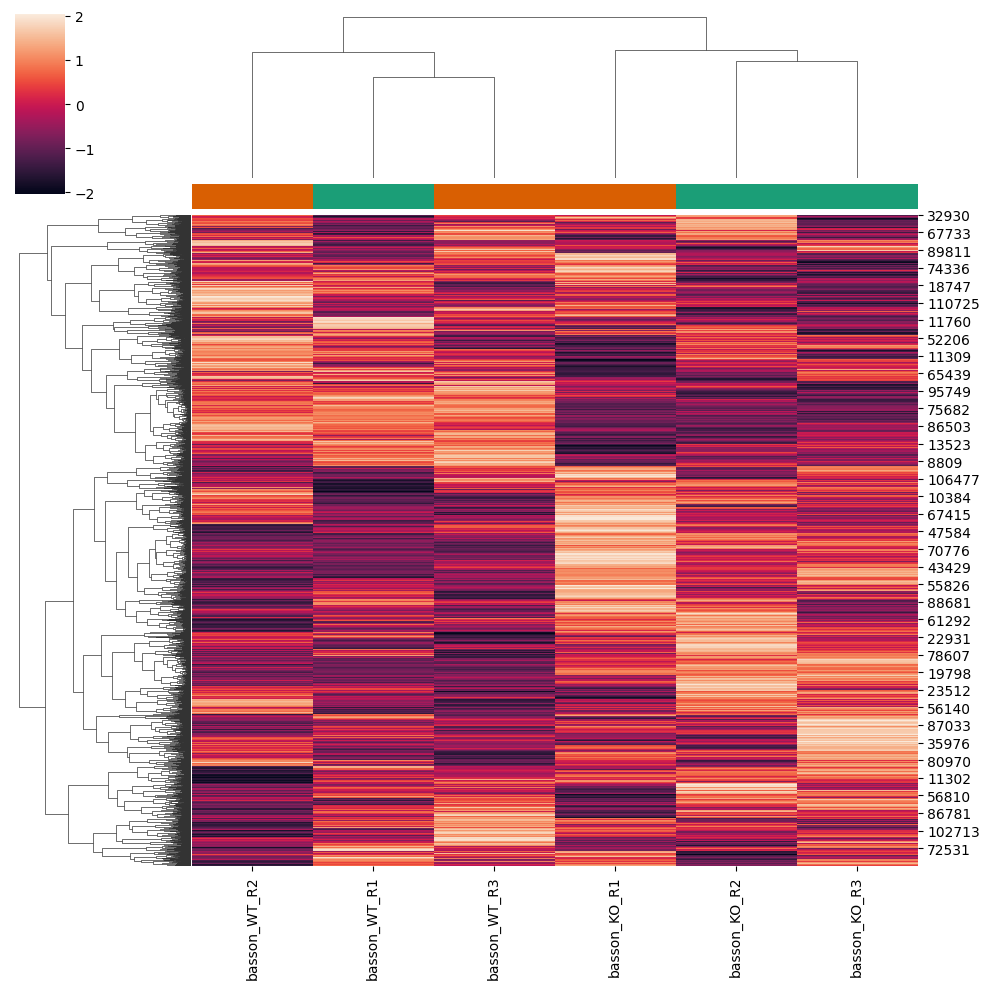

In [121]:
subset_deffinetly_sex_regulated_df = pd.DataFrame(scaled_data, columns=numerical_columns)
sns.clustermap(subset_deffinetly_sex_regulated_df, z_score = 0, 
               col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02'],
                             metric = 'correlation')

In [108]:
subset_deffinetly_sex_regulated_df.shape

(41, 8)

In [65]:
subset_df.shape

(3222, 8)

4. You might need to scale and centre the data ... look through the tutorials above, what do they do? You might want to log transform the data too

In [95]:
from sklearn.preprocessing import StandardScaler 

# Extract the numerical columns needed to scale and centre 

numerical_columns = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3', 'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']

subset_df = normalised_counts[numerical_columns]
scaler = StandardScaler()

log2_subset = np.log2(subset_df + 1) 
log2_scaled_data = scaler.fit_transform(log2_subset)
scaled_data = scaler.fit_transform(subset_df)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

In [69]:
# Log transform the data
import numpy as np 

log_scaled_data = np.log2(scaled_data + 1) + 0 

Z = pd.DataFrame(log_scaled_data, columns=numerical_columns)

In [85]:
normalised_counts

,peak_id,basson_KO_R1,basson_KO_R2,basson_KO_R3,basson_WT_R1,basson_WT_R2,basson_WT_R3,category
0,atac_de_peak_chr1_3094800_3095300,70.807221,74.746079,55.686409,67.492308,74.726960,47.857595,not_sex_or_chd7_regulated
1,atac_de_peak_chr1_3333586_3334086,27.073349,23.160757,32.643757,23.497322,24.553144,25.234005,not_sex_or_chd7_regulated
2,atac_de_peak_chr1_3360824_3361324,91.632874,67.376747,72.008288,71.491852,56.578984,77.442290,not_sex_or_chd7_regulated
3,atac_de_peak_chr1_3369447_3369947,85.385178,60.007415,67.207735,44.994872,51.241344,34.805524,not_sex_or_chd7_regulated
4,atac_de_peak_chr1_3372613_3373113,104.128266,75.798840,74.888619,94.489231,58.714040,76.572152,not_sex_or_chd7_regulated
...,...,...,...,...,...,...,...,...
112337,atac_de_peak_chrY_90805461_90805961,22.908219,34.741135,25.922984,25.497094,77.929544,57.429114,not_sex_or_chd7_regulated
112338,atac_de_peak_chrY_90807482_90807982,91.632874,128.436924,65.287514,86.490143,180.412231,131.390851,not_sex_or_chd7_regulated
112339,atac_de_peak_chrY_90808554_90809054,120.788788,154.755966,74.888619,83.490485,240.193799,78.312428,not_sex_or_chd7_regulated
112340,atac_de_peak_chrY_90825143_90825643,52.064133,0.000000,0.000000,0.999886,54.443928,20.883314,deffinetly_sex_regulated


Label cluster map

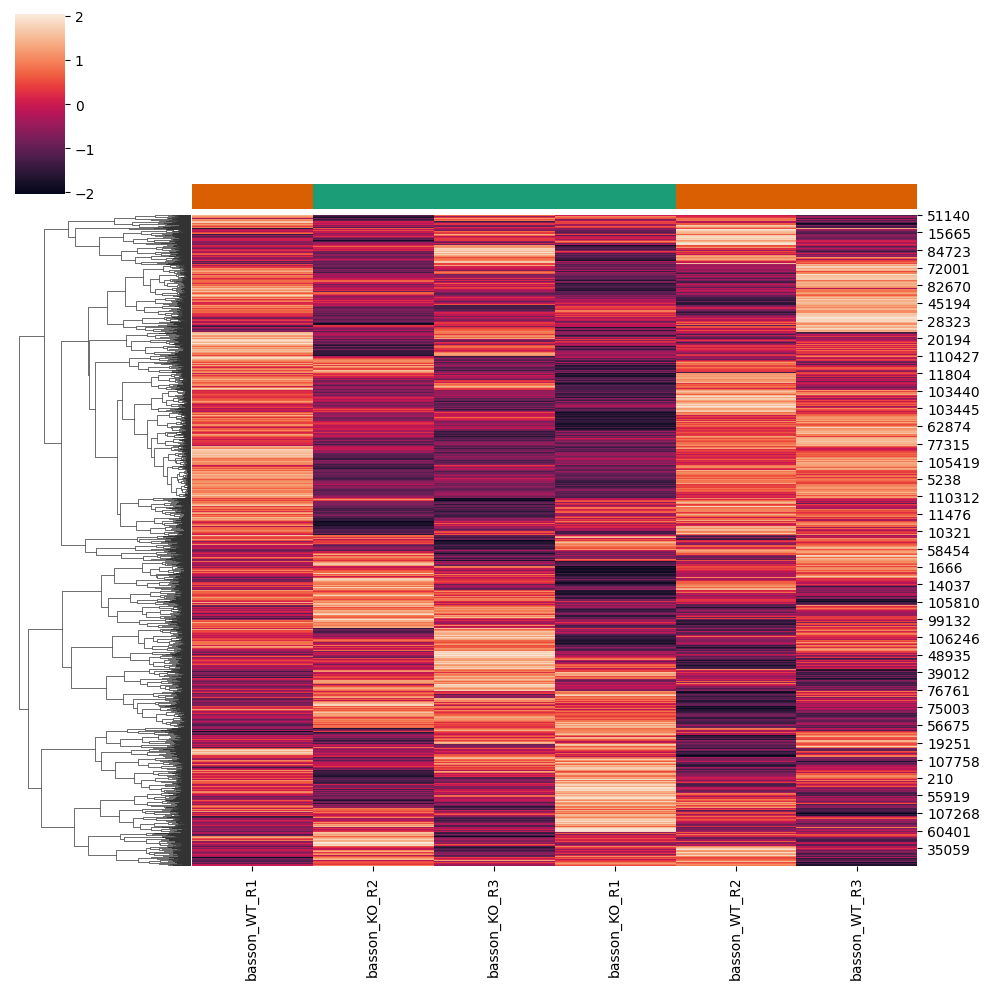

In [21]:
columns_to_compare = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3',
                      'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']

# Subset the DataFrame for the specified column
normalised_counts = normalised_counts[columns_to_compare]

# Compute differences between basson_WT_R2 and other columns
sns.clustermap(normalised_counts[['basson_WT_R1','basson_KO_R2','basson_KO_R3','basson_KO_R1','basson_WT_R2','basson_WT_R3']],col_cluster=False,
          z_score = 0, 
               col_colors = ['#d95f02', '#1b9e77', '#1b9e77', '#1b9e77', '#d95f02', '#d95f02'],
                             metric = 'correlation')     

plt.show()

In [134]:
print(differences.isna().sum())
print(differences.apply(pd.Series.nunique))

basson_KO_R1    112342
basson_KO_R2    112342
basson_KO_R3    112342
basson_WT_R1    112342
basson_WT_R2    112342
basson_WT_R3    112342
dtype: int64
basson_KO_R1    0
basson_KO_R2    0
basson_KO_R3    0
basson_WT_R1    0
basson_WT_R2    0
basson_WT_R3    0
dtype: int64


5. Lets try and plot the data using clustermap 

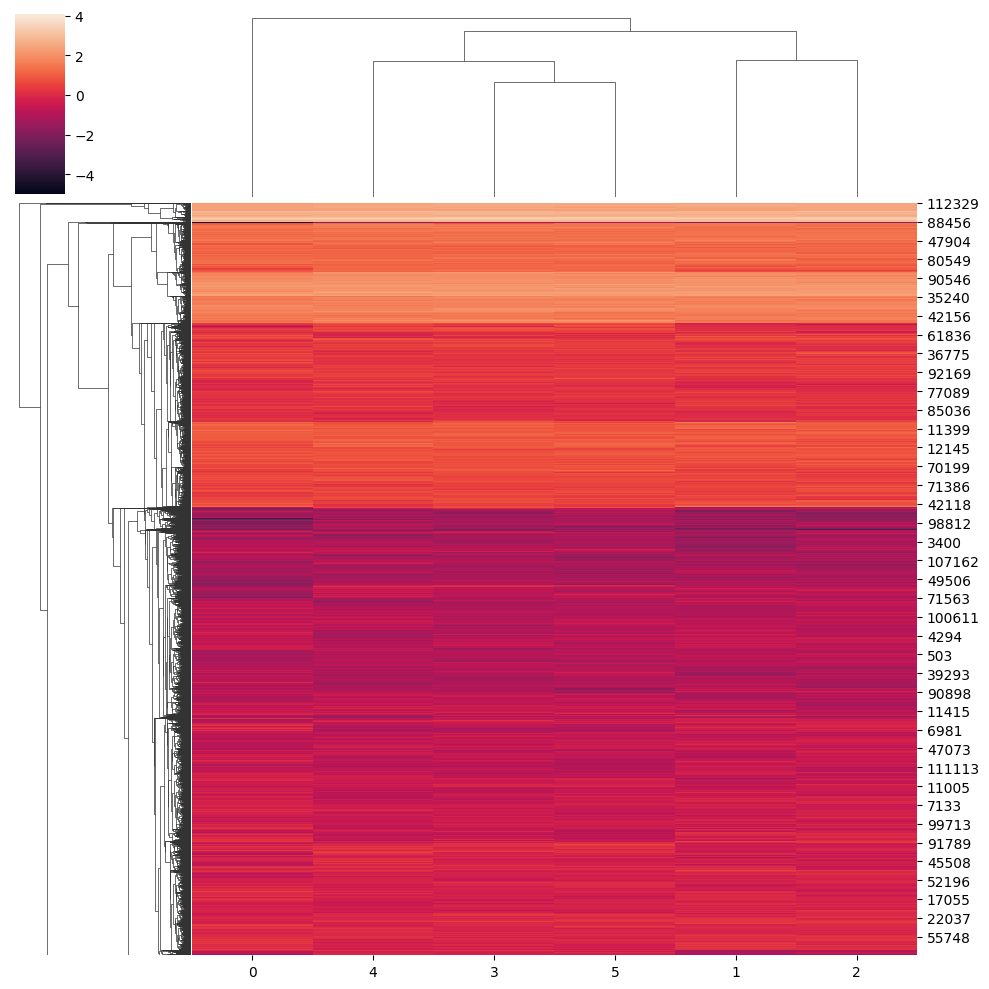

In [96]:
sns.clustermap(log2_scaled_data)

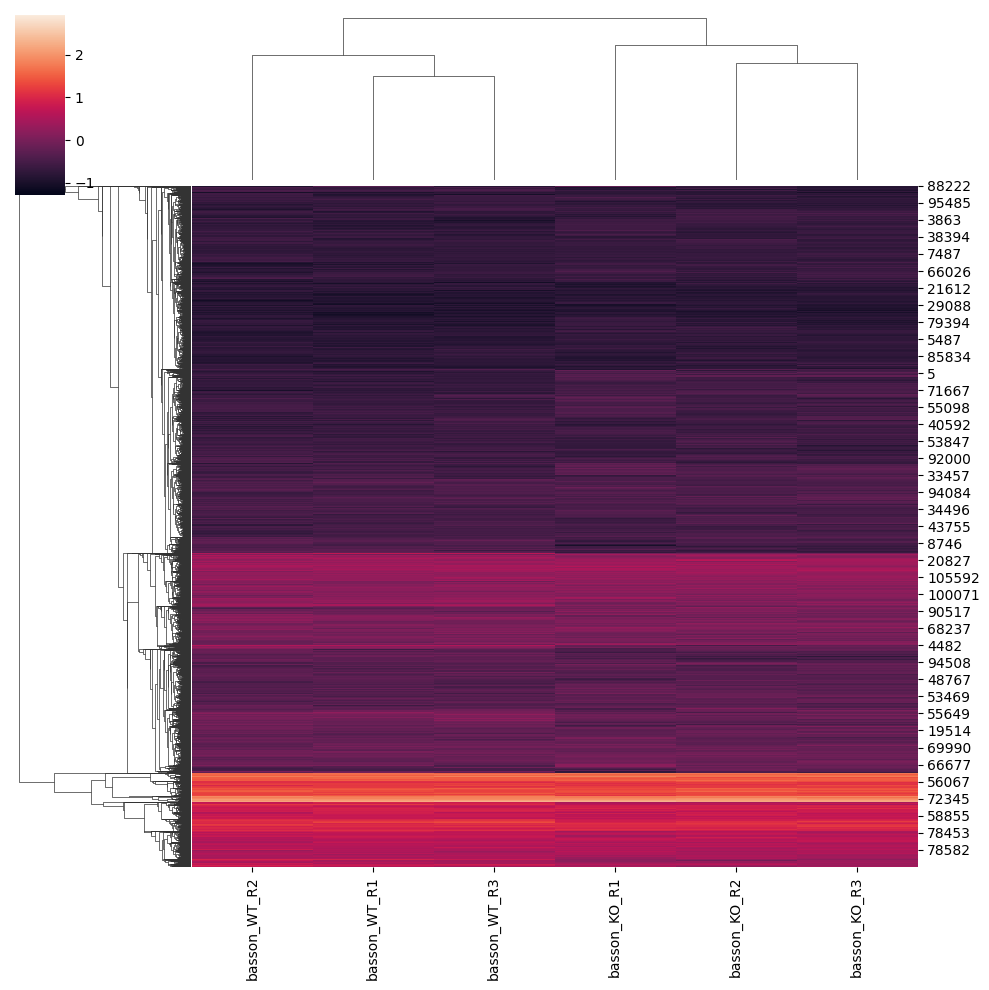

In [74]:
import seaborn as sns

sns.clustermap(log_scaled_df)


In [ ]:
# Cluster definisty sex regulated 

Raw data, log data, zscores, distances, correlation map 

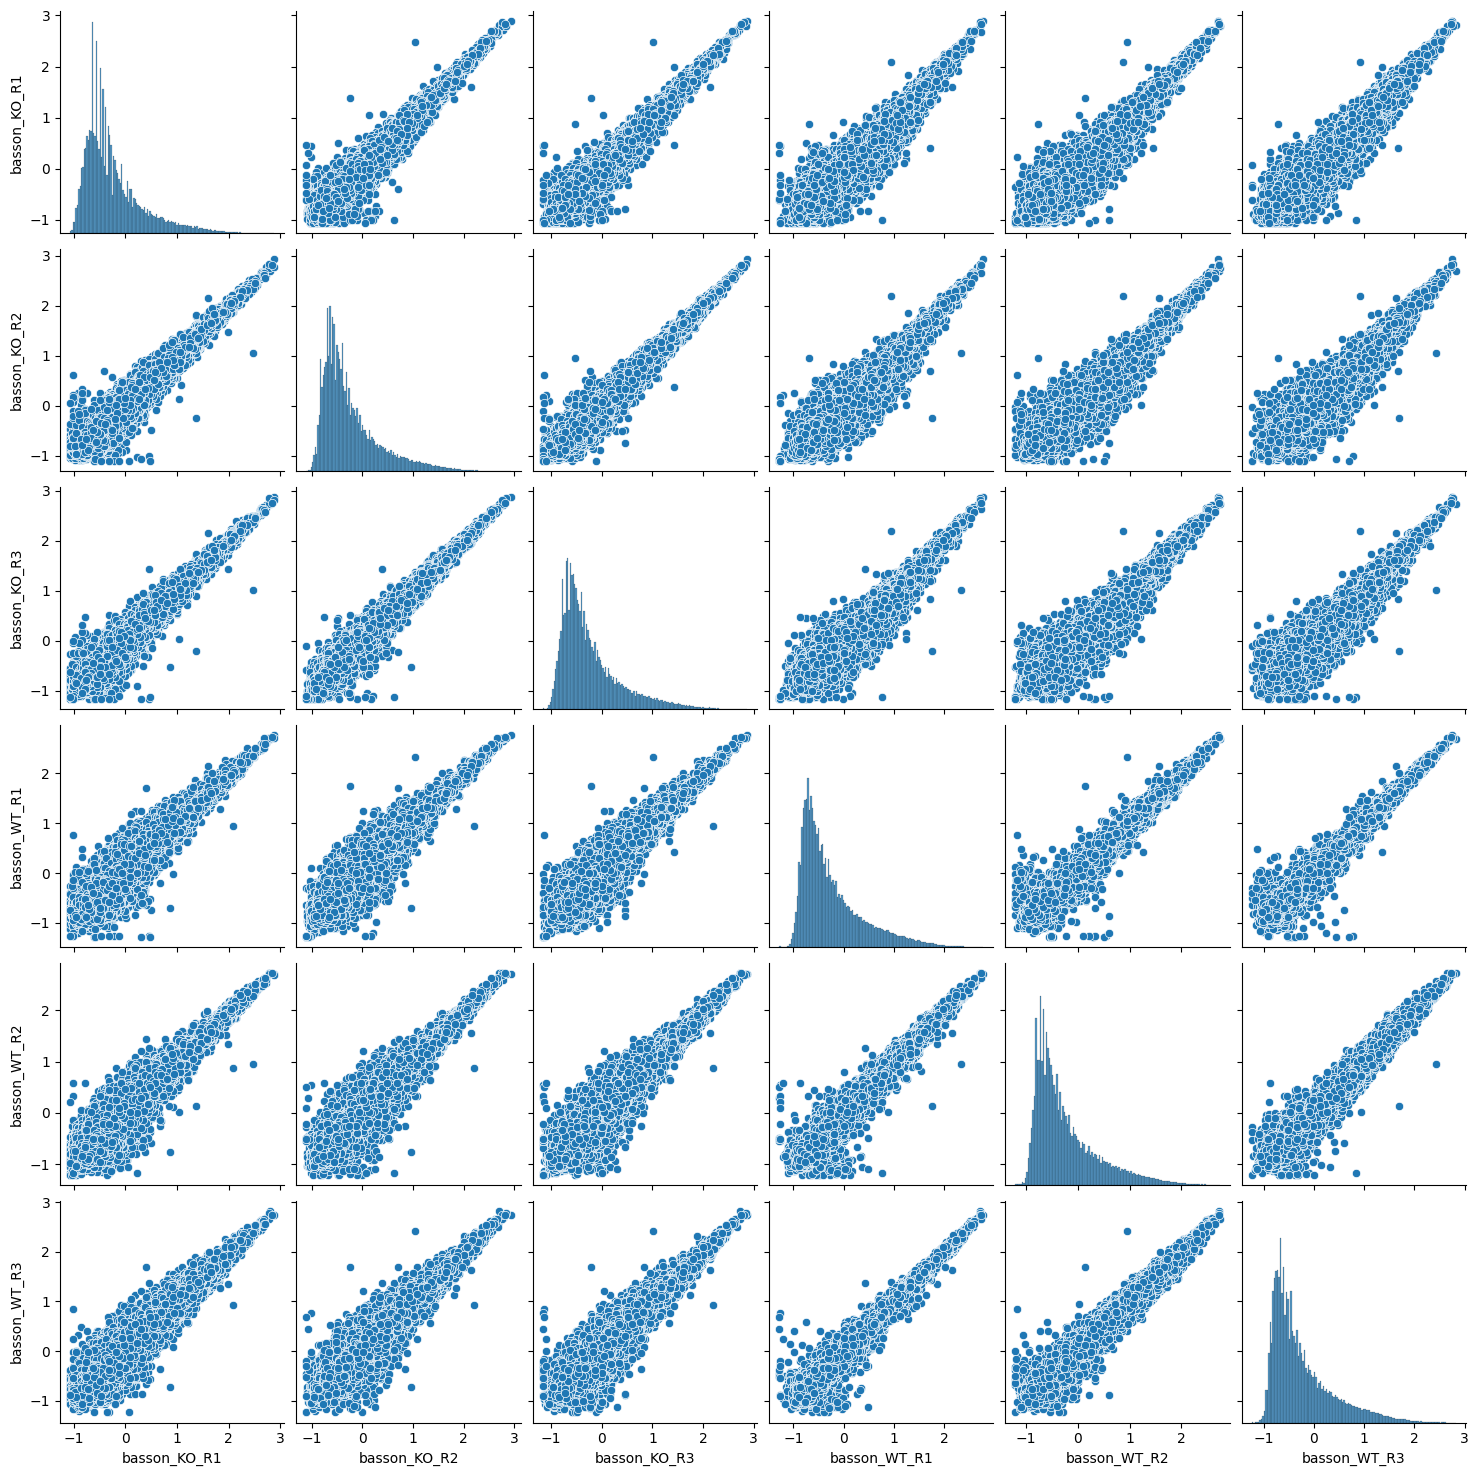

In [ ]:
# Pairplot - creates pairewiise scatterplots for multiple numeric variables 
import matplotlib.pyplot as plt
sns.pairplot(log_scaled_df)
plt.show()

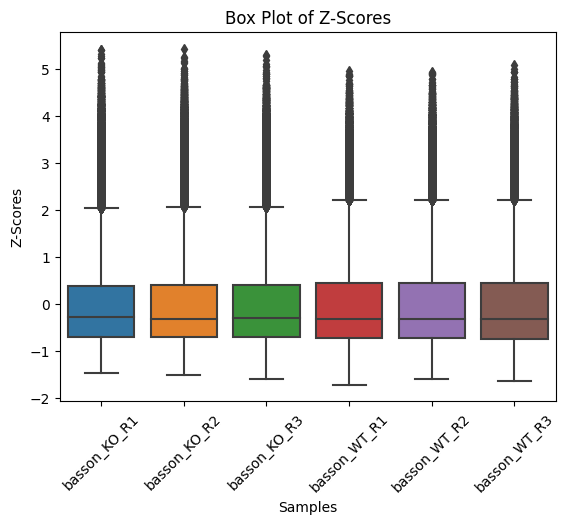

In [80]:
# Z-scores create visualisations of the standardised values of data. Meaning it will substract the mean and divide by the standard deviation resulting in z-scores 

z_score_columns = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3', 'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']
z_scores = (log_scaled_df[z_score_columns] - log_scaled_df[z_score_columns].mean()) / log_scaled_df[z_score_columns].std()
sns.boxplot(data=z_scores)
plt.title('Box Plot of Z-Scores')
plt.xlabel('Samples')
plt.ylabel('Z-Scores')
plt.xticks(rotation=45)
plt.show()

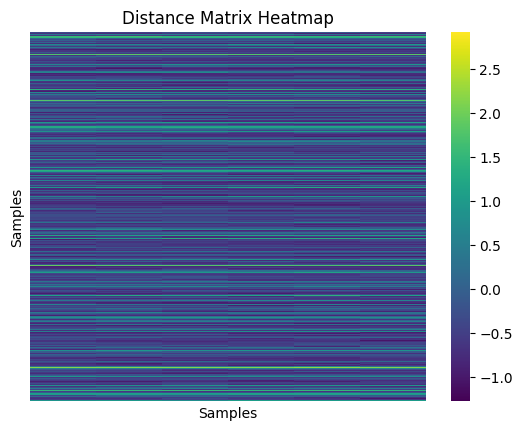

In [83]:
# Distance matrices 

sns.heatmap(log_scaled_df, cmap='viridis', xticklabels=False, yticklabels=False)
plt.title('Distance Matrix Heatmap')
plt.xlabel('Samples')
plt.ylabel('Samples')
plt.show()

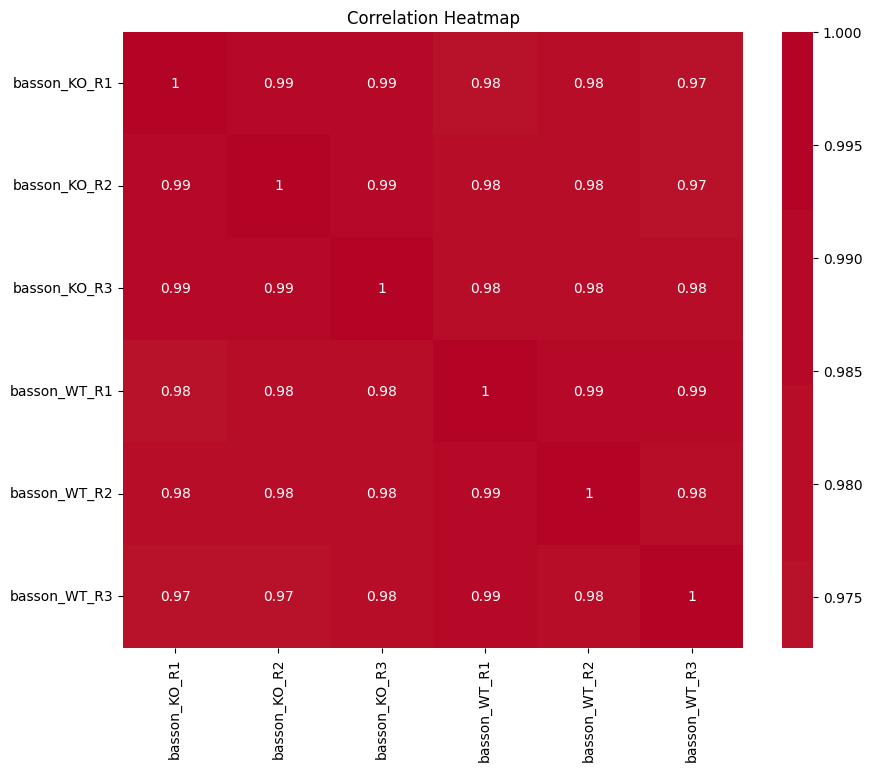

In [84]:
# Plotting Correlation Heatmap

correlation_matrix = scaled_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

potentially sex regulated = unsubset it 

In [86]:
comparison_columns = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3', 'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']

# Create a pair plot
sns.pairplot(scaled_df[comparison_columns])
plt.suptitle("Pair Plot of Columns Comparison", y=1.02)
plt.show()

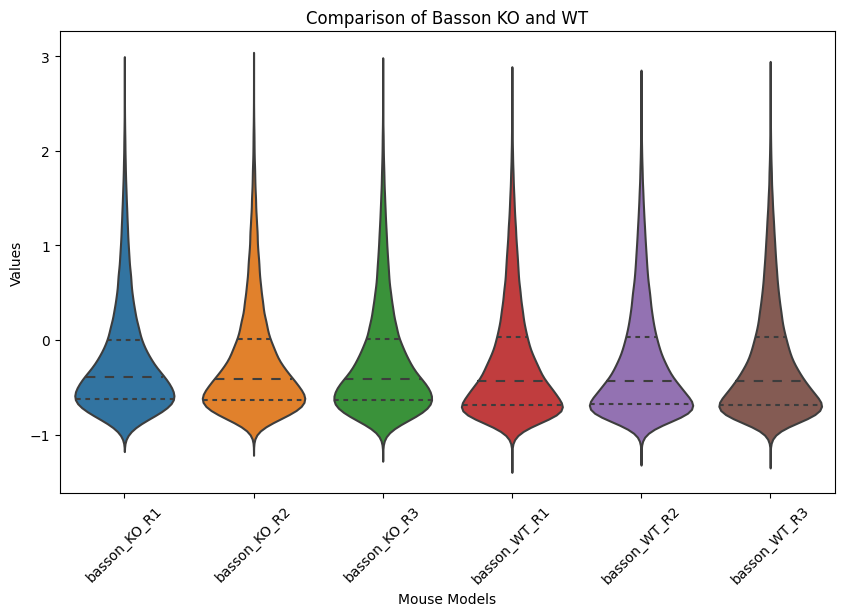

In [89]:
columns_to_compare = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3', 
                      'basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=log_scaled_df[columns_to_compare], inner='quartile')
plt.xticks(rotation=45)
plt.title("Comparison of Basson KO and WT")
plt.xlabel("Mouse Models")
plt.ylabel("Values")
plt.show()

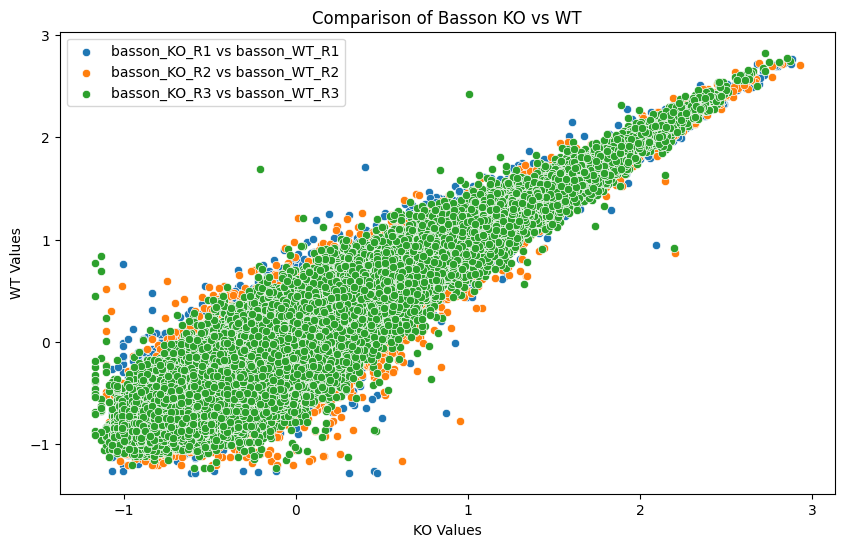

In [92]:
# Scatterplot 

columns_to_compare_KO = ['basson_KO_R1', 'basson_KO_R2', 'basson_KO_R3']
columns_to_compare_WT = ['basson_WT_R1', 'basson_WT_R2', 'basson_WT_R3']

# Create scatter plots for each pair of columns
plt.figure(figsize=(10, 6))
for col_KO, col_WT in zip(columns_to_compare_KO, columns_to_compare_WT):
    sns.scatterplot(data=log_scaled_df, x=col_KO, y=col_WT, label=f'{col_KO} vs {col_WT}')

plt.title("Comparison of Basson KO vs WT")
plt.xlabel("KO Values")
plt.ylabel("WT Values")
plt.legend()
plt.show()

In [93]:
from scipy.cluster import hierarchy


# Calculate the distance matrix
distance_matrix = np.sqrt((log_scaled_df - log_scaled_df.mean()) ** 2)

# Apply hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='ward')

# Get the row and column dendrogram positions
row_dendro = hierarchy.dendrogram(linkage_matrix, no_plot=True)
col_dendro = hierarchy.dendrogram(linkage_matrix, no_plot=True)

# Reorder the rows and columns based on the clustering
reordered_rows = log_scaled_df.index[row_dendro['leaves']]
reordered_cols = log_scaled_df.columns[col_dendro['leaves']]
clustered_df = log_scaled_df.loc[reordered_rows, reordered_cols]

# Create the clustered bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=clustered_df, orient='h', palette='viridis')
plt.title('Clustered Bar Plot')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

IndexError: index 48302 is out of bounds for axis 0 with size 6